# アヤメの分析

### フィッシャーのアヤメ
「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。
setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

### データセットの準備
scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

In [3]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。



In [4]:
""" 
sklearnからアヤメデータセットロード
"""
iris=load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [5]:
"""
Pandasをインポートし、説明変数を下のようなPandasのDataFrame型変数Xに格納する。
"""

#store feature matrix in "x"
x=pd.DataFrame(data=iris.data, columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#store response vector in "y"
y=pd.DataFrame({"Species":iris.target})

y[::50]#0,50,100行目に対応するSpeciesを取り出す

,Species
0,0
50,1
100,2


## 【問題2】データの結合

問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [7]:
#merge data 
df=pd.concat([x,y],axis=1)
df[::50]#結合結果確認

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


## 【問題3】データの確認
.head(),.info(),.describe(),.count(),.isnull(),.sum()などのPandasのメソッドを使ってみましょう。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

In [8]:
"""
先頭から4番目までのサンプルを表示
"""

print(df.head(4))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  


In [9]:
"""
各特徴量がどういったものかを見る。（数値データか文字データかなど）
"""
df.info()

"""
dtypes: float64(4), int64(1)ということがわかった。
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


'\ndtypes: float64(4), int64(1)ということがわかった。\n'

### ラベルごとのサンプル数の合計を出力する。

In [10]:
for i in range(4):
    print("{}のサンプル数は{}個です".format(iris.feature_names[i],df.iloc[:,i].shape[0]))

sepal length (cm)のサンプル数は150個です
sepal width (cm)のサンプル数は150個です
petal length (cm)のサンプル数は150個です
petal width (cm)のサンプル数は150個です


### 特徴量に欠損値があるかを確認する。

In [11]:
df.info()

"""sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int64

各ラベルの150のデータが欠損していないことを確認
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


'sepal length (cm)    150 non-null float64\nsepal width (cm)     150 non-null float64\npetal length (cm)    150 non-null float64\npetal width (cm)     150 non-null float64\nSpecies              150 non-null int64\n\n各ラベルの150のデータが欠損していないことを確認\n'

In [12]:
"""
isnull()でも確認
"""
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


---
### ※練習

In [14]:
#ユニークな値を確認
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
Species               3
dtype: int64

In [15]:
#行名を確認
df.index

RangeIndex(start=0, stop=150, step=1)

In [16]:
#列名を確認
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [17]:
## 各ラベルの情報確認
labels=df["Species"].unique() # ラベルの一覧を取得
for label in labels:
    print("label : {}".format(label))
    display(df.query("Species =={}".format(label)).head())
    display(df.query("Species =={}".format(label)).tail())
    # df[df["Species"]==label] でもOK
    print("----------")


label : 0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
45,4.8,3.0,1.4,0.3,0
46,5.1,3.8,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0


----------
label : 1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


----------
label : 2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


----------


##  【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

#### (データの内容)

“setosa”, “versicolor”, “virginica” の 3 種類のアヤメのがく片 (Sepal)、花弁 (Petal) の幅および長さを計測したデータ

サンプル数：150本(50本＊3種類)


-----
#### 模範解答 （解答例）

統計学者ロナルドフィッシャーが1936年に発表した論文[1]で使用されたデータである。種類を分類する線形判別モデルを適用した。

データを集めたのは植物学者のエドガーアンダーソンである。

[1] R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x .

### 特徴量についての探索
各特徴量や特徴量同士の関係を見ていきます。

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

- sepal_widthの列を３つの異なる方法で抽出する

In [18]:
# sepal_widthの列を３つの異なる方法で抽出する
# .locで抽出
df.loc[:, "sepal width (cm)"].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [19]:
#  iloc で抽出
df.iloc[:, 1].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [20]:
# .at で抽出
#表示が長くなるためhead()と同じ５つ分を抽出
at_data=[]
for i in range(5):
    at_data.append(df.at[i,"sepal width (cm)"])

at_data

[3.5, 3.0, 3.2, 3.1, 3.6]

→locは、ラベルを指定してデータを抽出できるのに対し、

　ilocは、絶対座標で指定することができる。

-----
#### (模範解答)

In [21]:
df["sepal width (cm)"].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

-------
- 50番目から99番目までのデータを抽出する

In [22]:
df.loc[50:99]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


--------
- petal_lengthの列の50番目から99番目までのデータを抽出する

In [23]:
df.loc[50:99, "petal length (cm)"]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64

--------
- petal_widthの値が0.2のデータを抽出する

In [24]:
df[df["petal width (cm)" ]==0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

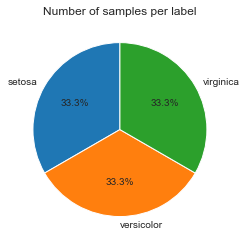

In [25]:
"""
ラベルごとのサンプル数の割合を円グラフとして作成
"""


label_counts=df["Species"].value_counts()

sns.set_style('whitegrid')

fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.pie(label_counts, labels=iris.target_names, startangle=90, autopct="%1.1f%%")
plt.title("Number of samples per label")

plt.show()

- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

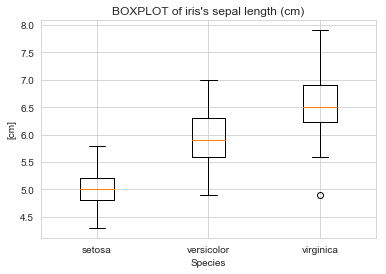

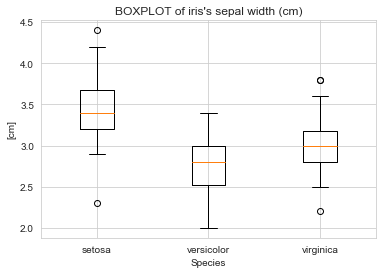

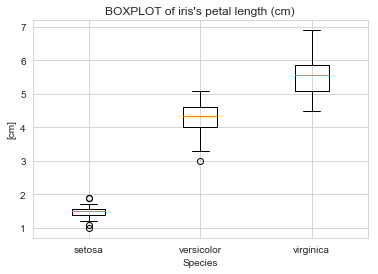

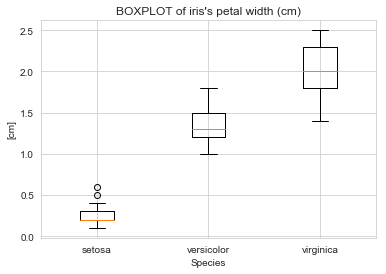

In [26]:
features=iris.feature_names

for feature in features:
    plt.boxplot([df[df["Species"]==0][feature],df[df["Species"]==1][feature],df[df["Species"]==2][feature]])
    plt.xticks([1,2,3],iris.target_names)
    plt.ylabel("[cm]")
    plt.xlabel("Species")
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.show()

- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する 箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

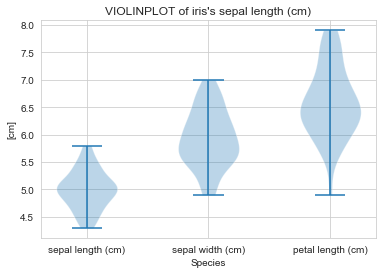

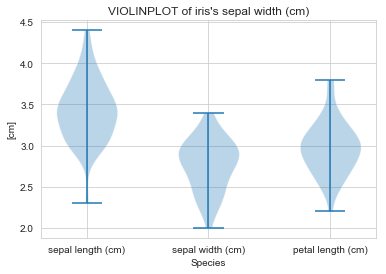

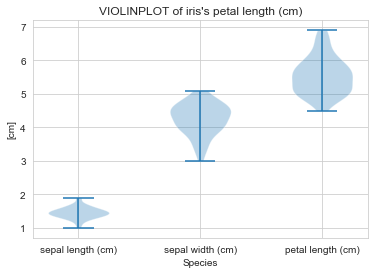

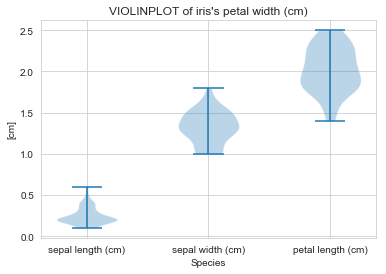

In [27]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
features = iris.feature_names

for feature in features:
    plt.violinplot([df[df["Species"]==0][feature],df[df["Species"]==1][feature],df[df["Species"]==2][feature]])
    plt.xticks([1, 2, 3], iris.feature_names)
    plt.ylabel("[cm]")
    plt.xlabel("Species")
    plt.title("VIOLINPLOT of iris's {}".format(feature))
    plt.show()
    

箱ひげ図は四分位数が見やすく、バイオリンプロットは分布の多寡がわかりやすい。

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

In [1]:
target_names=iris.target_names
df['spea']=df['class'].apply(lambda x: target_names[int(x)])
display(df)

NameError: name 'iris' is not defined

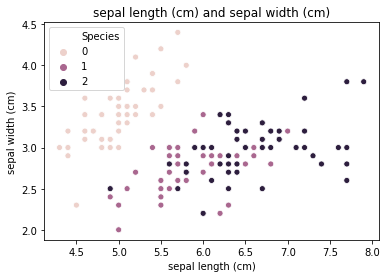

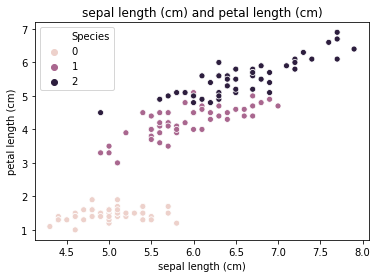

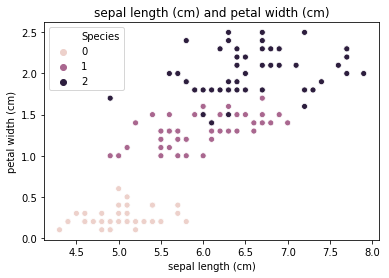

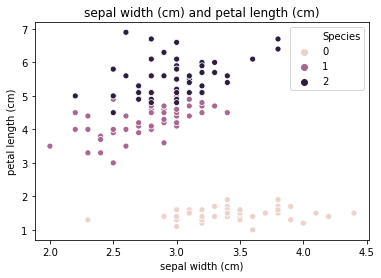

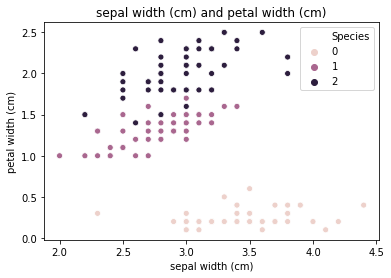

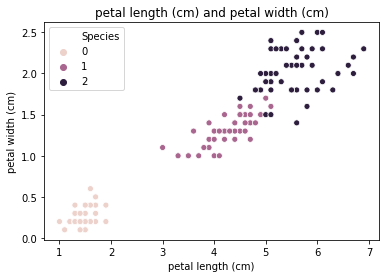

In [21]:
comb=list(itertools.combinations(iris.feature_names, 2)) # 組み合わせの取得

features=iris.feature_names

for i in range(len(comb)):
    ax=sns.scatterplot(x=comb[i][0], y=comb[i][1], hue="Species", data=df)
    plt.title("{} and {}".format(comb[i][0],comb[i][1]))
    plt.show()

- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

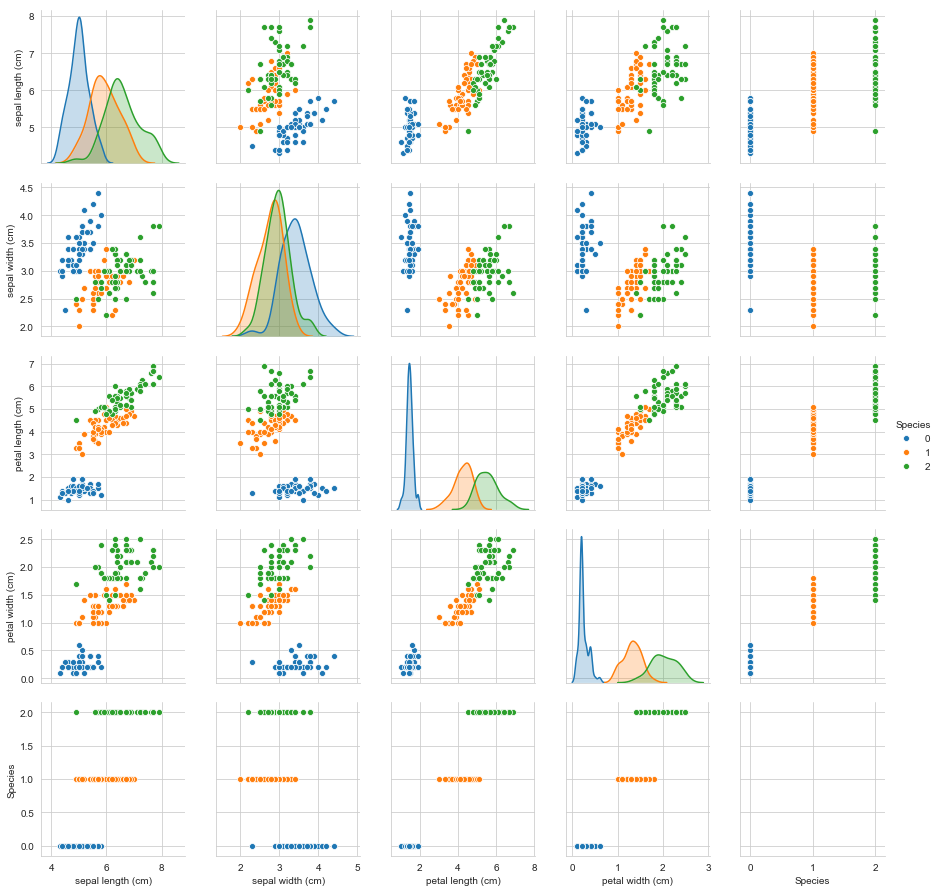

In [28]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

sns.pairplot(df, hue='Species')

- ４つの特徴量に関する相関係数行列を作る

In [29]:
# ４つの特徴量に関する相関係数行列を作る

df_corr=df.iloc[:, 0:4].corr()
df_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


- 相関係数行列のヒートマップを作る

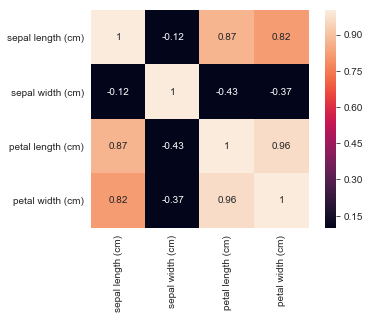

In [30]:
sns.heatmap(df_corr, vmax=1.0, vmin=0.1,square=True, annot=True)
plt.show()

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

#### 考察
今回のデータ分析で、petal_wdithとpetal_lengthは相関係数が0.96と強い相関があることがわかった。
次いで、petal_wdithとpetal_lengthは、sepal lengthとの相関が高かった。


#### (解答例）

箱ひげ図やバイオリン図、散布図行列などから種類0はpetal_lengthやpetal_widthが短いという特徴が見えた。これらの特徴量では種類1と2の間でも長さの傾向の違いはあったが、境界は分けにくそうであった。

相関行列を見ると、petal_wdithとpetal_lengthは相関係数が0.96あり、強い正の相関であった。片方だけ見れば良さそうであった。

sepal_lengthやsepal_widthは箱ひげ図やバイオリン図で単独で見ると重なりあっている部分が多かった。しかし、散布図で2つの特徴量を組み合わせれば種類ごとの違いも見えてきた。